In [1]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

In [6]:
wav1, sr = sf.read('/home/yangwenhao/storage/dataset/voxceleb1/voxceleb1_wav/vox1_dev_wav/wav/id10001/1zcIwhmdeo4/00001.wav')

In [2]:
y, sr = librosa.load('/home/yangwenhao/storage/dataset/voxceleb1/voxceleb1_wav/vox1_dev_wav/wav/id10001/1zcIwhmdeo4/00001.wav')

f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'),
                                                sr=sr, frame_length=400, win_length=200)

times = librosa.times_like(f0)

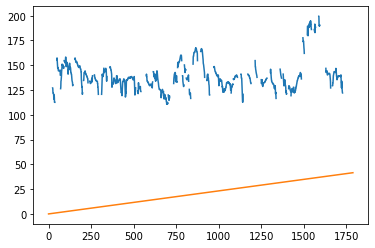

In [4]:
plt.plot(f0)
plt.plot(times)
# plt.ylim(0, 3000)

In [17]:
librosa.version

<module 'librosa.version' from '/home/yangwenhao/anaconda3/envs/py37/lib/python3.7/site-packages/librosa/version.py'>

AttributeError: module 'librosa' has no attribute 'display'

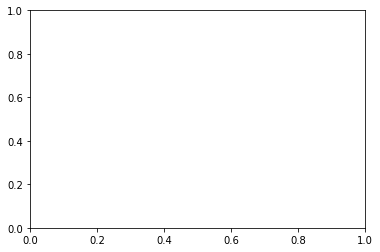

In [5]:
# import matplotlib.pyplot as plt
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
# plt.imshow(D.transpose())

ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

In [7]:
print(librosa.version.version)

0.9.2
